In [151]:
import pandas as pd

df = pd.read_json("./data/Pet_Supplies_5.json", lines=True)
df.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3,2,True,"12 2, 2016",A2KN4FJVI2TZSF,0972585419,M.G.,I purchased this cd for my Pocket Parrot. It h...,It's okay,1480636800,NaN,NaN
1,3,NaN,True,"10 17, 2016",A3RMA1DD66JDRV,0972585419,Susan P.,"Maybe it's just my Amazon parrot, but she's no...",It might work for a different bird,1476662400,NaN,NaN
2,5,2,True,"09 9, 2016",AAANYRIEOIT3R,0972585419,Luggie Lugnut,I bought this to help me teach my blue quaker ...,I bought this to help me teach my blue quaker ...,1473379200,NaN,NaN
3,3,NaN,True,"08 31, 2016",A3W44VX0LXAOHU,0972585419,Melissa Partin,Bird showed no interest in it....,Three Stars,1472601600,NaN,NaN
4,2,NaN,True,"08 18, 2016",A16ZDBZGKYDRSU,0972585419,Cheryle Bell,Didn't do a thing for my African Grey! He hate...,He hated it and it was very obnoxious,1471478400,NaN,NaN


In [152]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098325 entries, 0 to 2098324
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   vote            object
 2   verified        bool  
 3   reviewTime      object
 4   reviewerID      object
 5   asin            object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  style           object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 178.1+ MB


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>]], dtype=object)

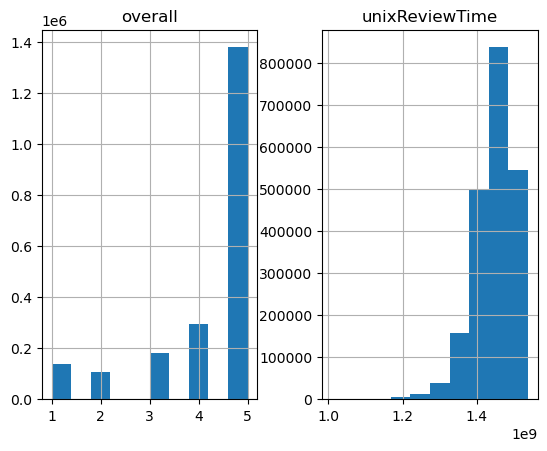

In [153]:
df.hist()


In [154]:
len_df = len(df)
print(len_df)

len_train = int(round(len_df * 0.6))
len_val_test = (len_df - len_train) // 4
len_train = len_train // 2

print(len_train)
print(len_val_test)

2098325
629497
209832


In [226]:
df_1 = df.loc[df['overall'] == 1].copy().dropna(subset="reviewText")
df_2 = df.loc[df['overall'] == 2].copy().dropna(subset="reviewText")
df_3 = df.loc[df['overall'] == 3].copy().dropna(subset="reviewText")
df_4 = df.loc[df['overall'] == 4].copy().dropna(subset="reviewText")
df_5 = df.loc[df['overall'] == 5].copy().dropna(subset="reviewText")
df_5 = df_5.drop(df_5.index[range(1000000)]) # hogy ne legyen ennyi 5 csillagos értékelés

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fcca40d1040>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/nlp/lib/python3.9/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [157]:


len_df_1 = len(df_1)
len_df_2 = len(df_2)
len_df_3 = len(df_3)
len_df_4 = len(df_4)
len_df_5 = len(df_5)

len_train_1 = int(round(len_df_1 * 0.7))
len_val_test_1 = (len_df_1 - len_train_1) // 4
len_train_1 = len_train_1 // 2

len_train_2 = int(round(len_df_2 * 0.7))
len_val_test_2 = (len_df_2 - len_train_2) // 4
len_train_2 = len_train_2 // 2

len_train_3 = int(round(len_df_3 * 0.7))
len_val_test_3 = (len_df_3 - len_train_3) // 4
len_train_3 = len_train_3 // 2

len_train_4 = int(round(len_df_4 * 0.7))
len_val_test_4 = (len_df_4 - len_train_4) // 4
len_train_4 = len_train_4 // 2

len_train_5 = int(round(len_df_5 * 0.7))
len_val_test_5 = (len_df_5 - len_train_5) // 4
len_train_5 = len_train_5 // 2



df_1_test = df_1[:len_train_1].copy()
df_2_test = df_2[:len_train_2].copy()
df_3_test = df_3[:len_train_3].copy()
df_4_test = df_4[:len_train_4].copy()
df_5_test = df_5[:len_train_5].copy()

df_1_val = df_1[len_train_1:len_train_1+len_val_test_1].copy()
df_2_val = df_2[len_train_2:len_train_2+len_val_test_2].copy()
df_3_val = df_3[len_train_3:len_train_3+len_val_test_3].copy()
df_4_val = df_4[len_train_4:len_train_4+len_val_test_4].copy()
df_5_val = df_5[len_train_5:len_train_5+len_val_test_5].copy()

df_1_train = df_1[len_train_1+len_val_test_1:].copy()
df_2_train = df_2[len_train_2+len_val_test_2:].copy()
df_3_train = df_3[len_train_3+len_val_test_3:].copy()
df_4_train = df_4[len_train_4+len_val_test_4:].copy()
df_5_train = df_5[len_train_5+len_val_test_5:].copy()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>]], dtype=object)

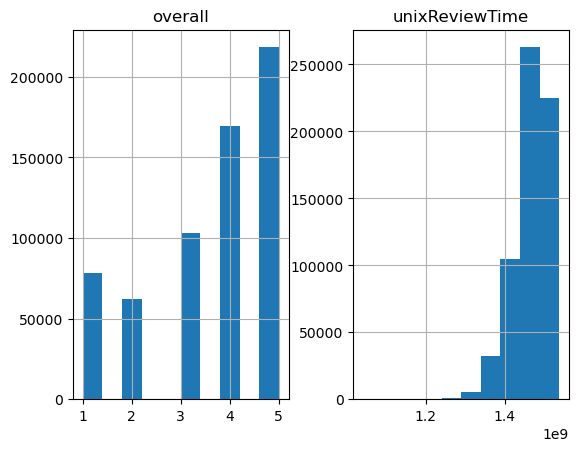

In [158]:
df_train = pd.concat([df_1_train, df_2_train, df_3_train, df_4_train, df_5_train])
df_train = df_train.sample(frac=1)
df_train.hist()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>]], dtype=object)

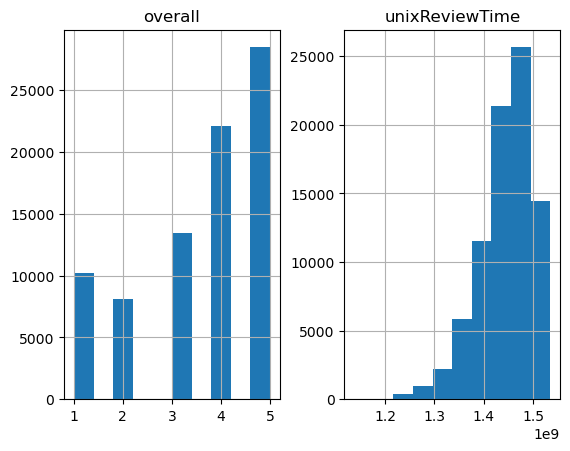

In [159]:
df_val = pd.concat([df_1_val, df_2_val, df_3_val, df_4_val, df_5_val])
df_val = df_val.sample(frac=1)
df_val.hist()

array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>]], dtype=object)

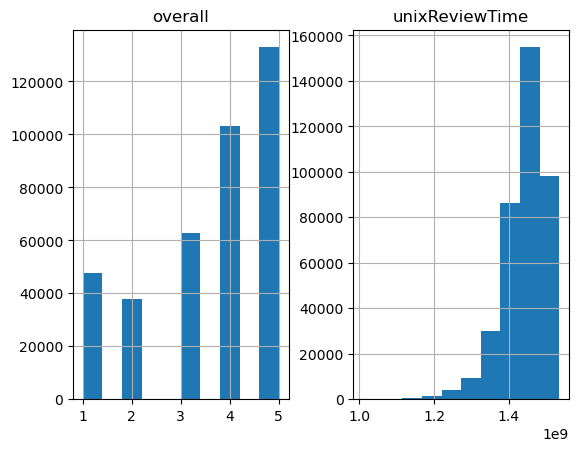

In [160]:
df_test = pd.concat([df_1_test, df_2_test, df_3_test, df_4_test, df_5_test])
df_test = df_test.sample(frac=1)
df_test.hist()
#df_test.head(5)

In [161]:
import json

train = "./data/pet_supplies_train.json"
df_train.to_json(train, orient="records")


In [162]:
df_readed_train = pd.read_json(train, orient='records')
df_readed_train.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,3,None,True,"07 25, 2018",A21FZDMUJ6TWMB,B00ITT2SDG,J. Mason,None of my three cats will play with this. It'...,CATS HATE IT,1532476800,{'Style:': ' SINGLE / LARGE'},None
1,5,None,True,"01 9, 2018",A3W2CSZZIW60LG,B00K75J8QK,snigdha,great product!,Five Stars,1515456000,"{'Size:': ' 340g', 'Flavor Name:': ' Green Tea'}",None
2,5,None,False,"10 13, 2014",A3MAW7T1TZV94I,B013OASU6S,SUE M.,Have used these for years. Great for my cats w...,Great for my cats water fountain,1413158400,{'Size:': ' 3 Filters'},None
3,5,None,True,"07 17, 2018",A169JX3H48MO0J,B0180A1J38,The Main Book Lover,Great stuff for my dogs smelly ears. Cleans we...,Great,1531785600,None,None
4,2,None,True,"05 27, 2017",A3U133H9OPP8WZ,B00BXWEUXM,Hyman Family,I love the look and was excited for my fish to...,Pretty but Too Rough & Sharp,1495843200,None,None


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>]], dtype=object)

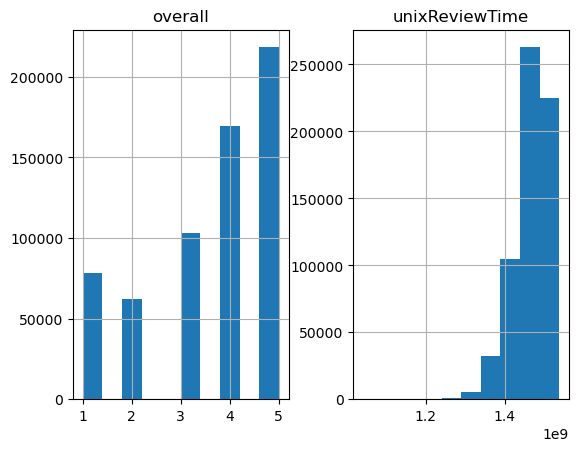

In [163]:
df_readed_train.hist()

In [164]:
val = "./data/pet_supplies_val.json"
df_val.to_json(val, orient="records")
df_readed_val = pd.read_json(val, orient='records')
df_readed_val.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2,NaN,True,"01 22, 2014",A1905UBK2O0CF9,B0018CE7SU,old crow,Four of the 5 squeakers did not work when the ...,Squeaker problem & NOT durable.,1390348800,{'Style:': ' Mama Lamb'},None
1,2,NaN,False,"12 8, 2014",AJ7VVCALVT8KP,B0029JVIH4,dynamo,I bought one of these balls at Gordman's for m...,save your money and buy the Chuckit! glow ball...,1417996800,"{'Size:': ' Large - 3.5 inch diameter', 'Color...",None
2,2,NaN,True,"04 4, 2016",A1IDLIOFINH2GO,B001SBMLAM,R. Alpers,I don't feel like it does anything.,Two Stars,1459728000,{'Size:': ' 1-Pack of 14 ounce'},None
3,5,NaN,True,"06 28, 2017",ACCBC20KC8EA,B00Y3PW4SO,Bacardiprincess,AMAZING!!! I wish I took a before picture but ...,AMAZING PRODUCT!!! Works like described!!!,1498608000,None,[https://images-na.ssl-images-amazon.com/image...
4,5,NaN,True,"12 7, 2016",A20NA2DOXVXJU5,B00YXP6AVQ,MangoMike,Cats love it and if they turn their nose at so...,Cats love it and if they turn their nose at so...,1481068800,{'Size:': ' 1.05oz / 30g - Value Size'},None


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'vote'}>],
       [<AxesSubplot:title={'center':'unixReviewTime'}>, <AxesSubplot:>]],
      dtype=object)

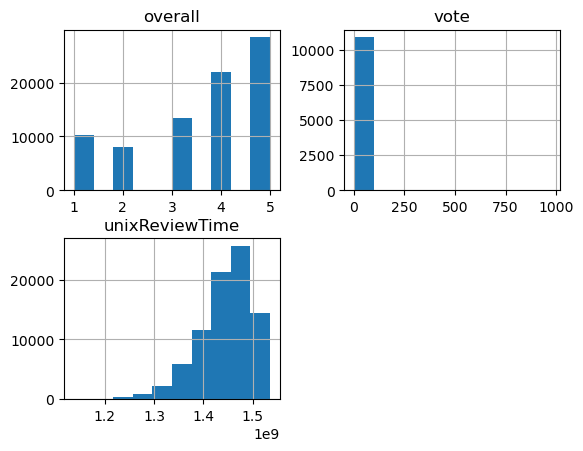

In [165]:
df_readed_val.hist()

In [166]:
test = "./data/pet_supplies_test.json"
df_test.to_json(test, orient="records")
df_readed_test = pd.read_json(test, orient='records')
df_readed_test.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,4,None,True,"12 21, 2015",A8UVIHLH24EV5,B000I1M76Q,Annah,Quite sturdy than I expected and it's perfect ...,Quite happy with the product.,1450656000,{'Style:': ' Playpen'},None
1,4,3,True,"12 8, 2015",A1ZDP0R6LFAAY2,B0002FP41I,PW,"I'm feeding this to my budgies, so one bag is ...",Great food fun for budgies,1449532800,None,None
2,5,None,True,"07 26, 2016",A29SCCH1FD2MZL,B00RP4UT32,Michael Westerfield,These pellets are small enough that I use them...,Recommended,1469491200,"{'Size:': ' 5 lb. Bag', 'Flavor Name:': ' Chic...",None
3,3,None,True,"09 30, 2013",A2TPQ633C045WO,B000084F80,Nicki126,MY 45 LB. DOG LOVES TO CHEW. THE HARD OUTER P...,PROBABLY NOT FOR BIG DOGS,1380499200,{'Size:': ' Medium'},None
4,4,None,False,"01 8, 2015",A1R0KZMJHYPL4N,B000I1QYQ0,HPinky,Love this cage! I bought it orginally for one ...,My boys love it !!,1420675200,{'Color:': ' Black'},None


array([[<AxesSubplot:title={'center':'overall'}>,
        <AxesSubplot:title={'center':'unixReviewTime'}>]], dtype=object)

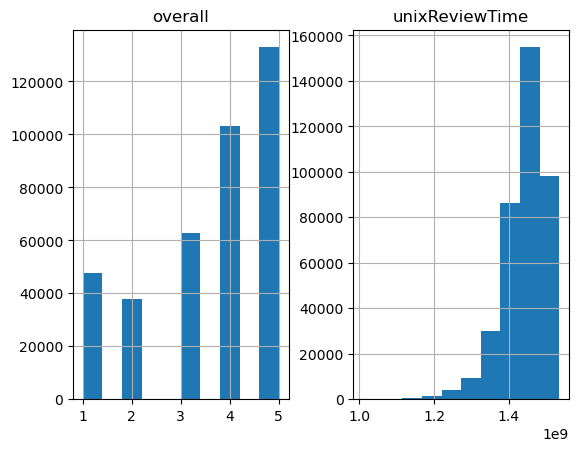

In [167]:
df_readed_test.hist()

In [169]:
import numpy as np
from tokenizers import BertWordPieceTokenizer

tokenizer = BertWordPieceTokenizer("./data/bert-base-uncased-vocab.txt",
                                   lowercase=True)

def bert_tokenizer(data):
    result = []
    for item in data:
        result.append(tokenizer.encode(item).ids)
    
    return np.array(result, dtype=object)

In [168]:
df_readed_train[df_readed_train["reviewText"].isnull()]

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image


In [193]:
nltk.download('punkt')

tokenized_reviews = df_train["reviewText"].apply(lambda review_text: word_tokenize(review_text.lower()))

tokenized_reviews.head()

[nltk_data] Downloading package punkt to /Users/kvcsmiki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2048631    [none, of, my, three, cats, will, play, with, ...
2052233                                  [great, product, !]
1787670    [have, used, these, for, years, ., great, for,...
1836884    [great, stuff, for, my, dogs, smelly, ears, .,...
1349088    [i, love, the, look, and, was, excited, for, m...
Name: reviewText, dtype: object

In [194]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

STOPWORDS = stopwords.words("english")

STOPWORDS[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kvcsmiki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [195]:
d = dict()

for review in tokenized_reviews:
    for word in review:
        if word not in STOPWORDS and word.isalpha():
            d[word] = d.get(word, 0) + 1
  

In [196]:
d["br"]

9

In [197]:
del(d["br"])

In [205]:



VOCAB = [k for k,v in sorted(d.items(), key=lambda item: item[1], reverse=True)]

In [206]:
len(VOCAB)

83721

In [184]:
import tensorflow as tf


X_train = list(df_readed_train["reviewText"].values)
X_train = bert_tokenizer(X_train)
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
y_train = df_train["overall"].values

X_val = list(df_readed_val["reviewText"].values)
X_val = bert_tokenizer(X_val)
X_val = tf.keras.preprocessing.sequence.pad_sequences(X_val, maxlen=maxlen)
y_val = df_val["overall"].values


X_test = list(df_readed_test["reviewText"].values)
X_test = bert_tokenizer(X_test)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
y_test = df_test["overall"].values

In [213]:
import tensorflow as tf

maxlen = 128
emb_size = 16
max_features = len(VOCAB) # vocab size

model_simple_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.SimpleRNN(units=emb_size, activation='tanh'),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model_simple_rnn.compile(optimizer='adam',
                         loss="sparse_categorical_crossentropy",
                         metrics=['accuracy'])

model_simple_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 128, 16)           1339536   
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 5)                 85        
                                                                 
Total params: 1,340,149
Trainable params: 1,340,149
Non-trainable params: 0
_________________________________________________________________


In [214]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h_simple_rnn = model_simple_rnn.fit(X_train, 
                                    y_train,
                                    epochs=5,
                                    batch_size=32,
                                    callbacks=[callback],
                                    validation_data=(X_val, y_val))

Epoch 1/5
19724/19724 [==============================] - 223s 11ms/step - loss: 1.1065 - accuracy: 0.5267 - val_loss: 1.0627 - val_accuracy: 0.5476
Epoch 2/5
19724/19724 [==============================] - 223s 11ms/step - loss: 1.0389 - accuracy: 0.5622 - val_loss: 1.0576 - val_accuracy: 0.5527
Epoch 3/5
19724/19724 [==============================] - 219s 11ms/step - loss: 1.0337 - accuracy: 0.5643 - val_loss: 1.1221 - val_accuracy: 0.5388
Epoch 4/5
19724/19724 [==============================] - 222s 11ms/step - loss: 1.0164 - accuracy: 0.5731 - val_loss: 1.0715 - val_accuracy: 0.5579
Epoch 5/5
19724/19724 [==============================] - 223s 11ms/step - loss: 1.0629 - accuracy: 0.5533 - val_loss: 1.1007 - val_accuracy: 0.5301


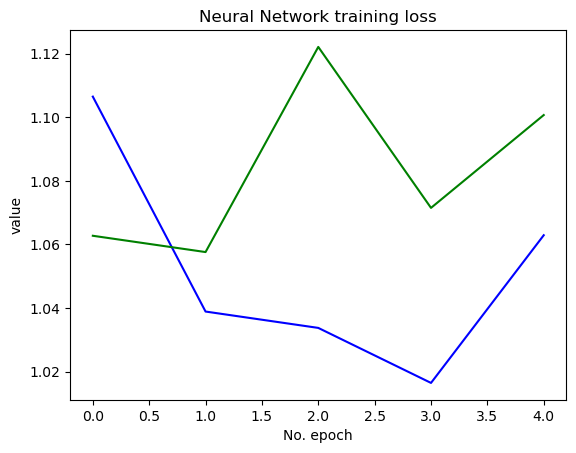

In [215]:
import matplotlib.pyplot as plt

plt.plot(h_simple_rnn.history['loss'], label='(training data)',color='blue')
plt.plot(h_simple_rnn.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

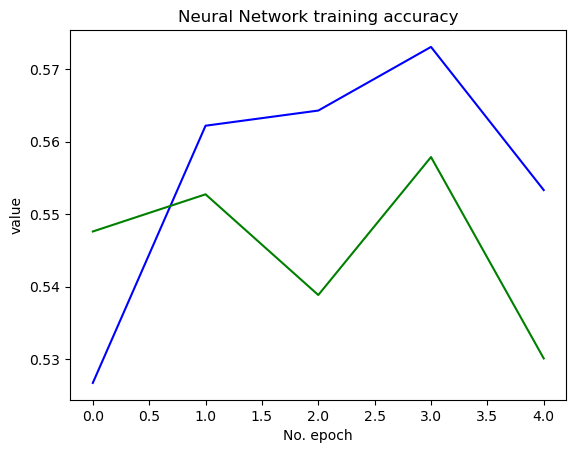

In [216]:
import matplotlib.pyplot as plt

plt.plot(h_simple_rnn.history['accuracy'], label='(training data)',color='blue')
plt.plot(h_simple_rnn.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [217]:
results = model_simple_rnn.evaluate(X_test, y_test, batch_size=32)
print("Simple rnn test loss, test acc:", results)

12006/12006 [==============================] - 26s 2ms/step - loss: 1.1039 - accuracy: 0.5283
Simple rnn test loss, test acc: [1.1039398908615112, 0.5282845497131348]


In [218]:
import tensorflow as tf

emb_size = 32
max_features = len(VOCAB) # vocab size

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.LSTM(units=emb_size, activation='tanh'),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model_lstm.compile(optimizer='adam',
                   loss="sparse_categorical_crossentropy",
                   metrics=['accuracy'])

model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 128, 32)           2679072   
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_8 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2,687,557
Trainable params: 2,687,557
Non-trainable params: 0
_________________________________________________________________


In [220]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h_lstm = model_lstm.fit(X_train, 
                        y_train,
                        epochs=5,
                        batch_size=32,
                        callbacks=[callback],
                        validation_data=(X_val, y_val))

Epoch 1/5
19724/19724 [==============================] - 580s 29ms/step - loss: 0.8972 - accuracy: 0.6177 - val_loss: 0.9167 - val_accuracy: 0.6072
Epoch 2/5
19724/19724 [==============================] - 577s 29ms/step - loss: 0.8552 - accuracy: 0.6361 - val_loss: 0.9076 - val_accuracy: 0.6120
Epoch 3/5
19724/19724 [==============================] - 577s 29ms/step - loss: 0.8236 - accuracy: 0.6503 - val_loss: 0.9084 - val_accuracy: 0.6134
Epoch 4/5
19724/19724 [==============================] - 578s 29ms/step - loss: 0.7962 - accuracy: 0.6635 - val_loss: 0.9182 - val_accuracy: 0.6118
Epoch 5/5
19724/19724 [==============================] - 577s 29ms/step - loss: 0.7707 - accuracy: 0.6760 - val_loss: 0.9415 - val_accuracy: 0.6077


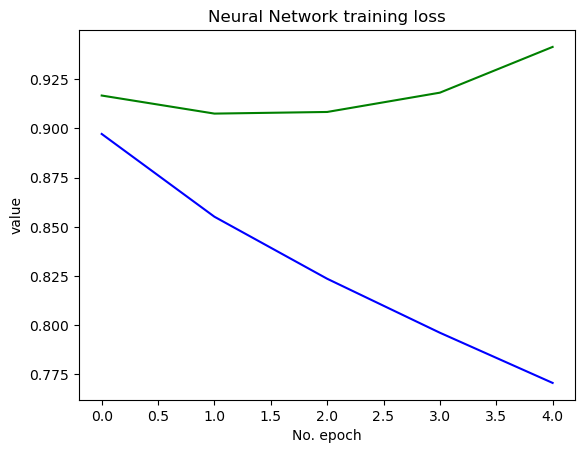

In [221]:
import matplotlib.pyplot as plt

plt.plot(h_lstm.history['loss'], label='(training data)',color='blue')
plt.plot(h_lstm.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

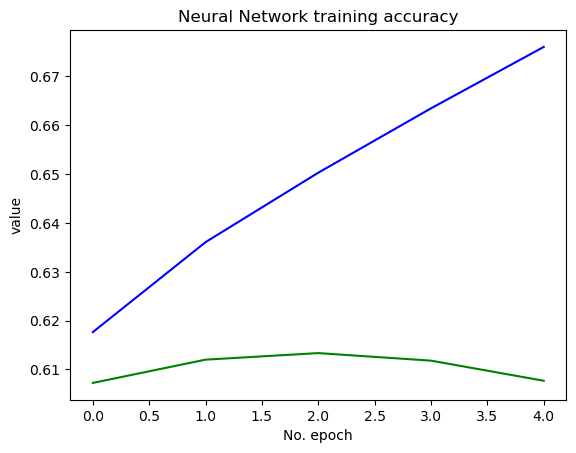

In [222]:
import matplotlib.pyplot as plt

plt.plot(h_lstm.history['accuracy'], label='(training data)',color='blue')
plt.plot(h_lstm.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [223]:
results = model_lstm.evaluate(X_test, y_test, batch_size=32)
print("LSTM test loss, test acc:", results)

12006/12006 [==============================] - 78s 7ms/step - loss: 0.9415 - accuracy: 0.6077
LSTM test loss, test acc: [0.9414520263671875, 0.6076942086219788]


In [224]:
import tensorflow as tf

emb_size = 32
max_features = len(VOCAB) # vocab size

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, emb_size, input_length=maxlen),
    tf.keras.layers.GRU(units=emb_size, activation='tanh'),
    tf.keras.layers.Dense(units=5, activation='softmax')
]) 

model_gru.compile(optimizer='adam',
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

model_gru.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 128, 32)           2679072   
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
Total params: 2,685,573
Trainable params: 2,685,573
Non-trainable params: 0
_________________________________________________________________


In [225]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

h_gru = model_gru.fit(X_train, 
                      y_train,
                      epochs=5,
                      batch_size=32,
                      callbacks=[callback],
                      validation_data=(X_val, y_val))

Epoch 1/5
19724/19724 [==============================] - 554s 28ms/step - loss: 0.9864 - accuracy: 0.5779 - val_loss: 0.9299 - val_accuracy: 0.6005
Epoch 2/5
19724/19724 [==============================] - 551s 28ms/step - loss: 0.8864 - accuracy: 0.6228 - val_loss: 0.8991 - val_accuracy: 0.6139
Epoch 3/5
19724/19724 [==============================] - 551s 28ms/step - loss: 0.8467 - accuracy: 0.6410 - val_loss: 0.8966 - val_accuracy: 0.6162
Epoch 4/5
19724/19724 [==============================] - 550s 28ms/step - loss: 0.8163 - accuracy: 0.6547 - val_loss: 0.9054 - val_accuracy: 0.6137
Epoch 5/5
19724/19724 [==============================] - 7777s 394ms/step - loss: 0.7888 - accuracy: 0.6678 - val_loss: 0.9154 - val_accuracy: 0.6147


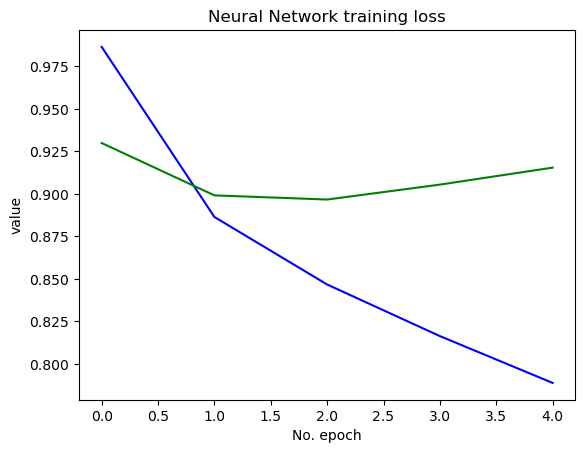

In [227]:
import matplotlib.pyplot as plt

plt.plot(h_gru.history['loss'], label='(training data)',color='blue')
plt.plot(h_gru.history['val_loss'], label='(val data)',color='green')
plt.title('Neural Network training loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

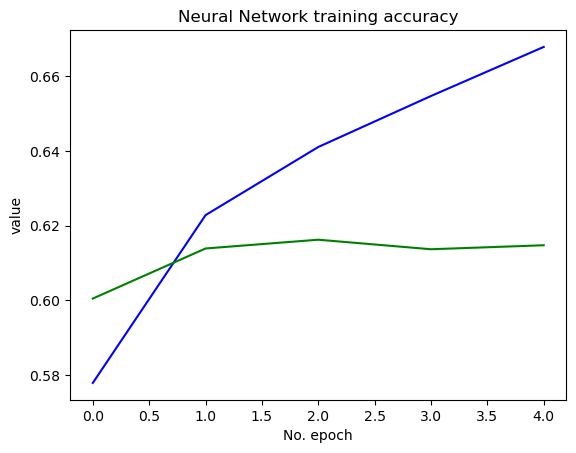

In [228]:
import matplotlib.pyplot as plt

plt.plot(h_gru.history['accuracy'], label='(training data)',color='blue')
plt.plot(h_gru.history['val_accuracy'], label='(val data)',color='green')
plt.title('Neural Network training accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.show()

In [229]:
results = model_gru.evaluate(X_test, y_test, batch_size=32)
print("GRU test loss, test acc:", results)

12006/12006 [==============================] - 62s 5ms/step - loss: 0.9196 - accuracy: 0.6115
GRU test loss, test acc: [0.9195844531059265, 0.6115152835845947]
